In [1]:
# tryng my own model with numpy 
# might try keras later
import numpy as np
import pandas as pd
from math import e, inf, sqrt
import random
from PIL import Image
import matplotlib.pyplot as plt

# activation 
def sig(x):
    y = 1/(1 + np.exp(-x))
    return y

# activation gradient
def sigDeriv(x):
    y = sig(x)*(1-sig(x))
    return y
x = np.array([1,2,3])
sigDeriv(x)



array([0.19661193, 0.10499359, 0.04517666])

In [2]:
dat = pd.read_csv("handwritten digits (images).csv",dtype=int)
numOfDatasets = len(dat)
dat

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
TrainingData = pd.DataFrame(dat.iloc[:, 1:]).to_numpy(copy=True, dtype=np.int32)

# normalise data (make mean 0 and std 1)
mean = np.mean(TrainingData)
std = np.std(TrainingData)
TrainingData = (TrainingData - mean)/std
sum(TrainingData[0,:])

-121.28699186719702

correct ans: 2


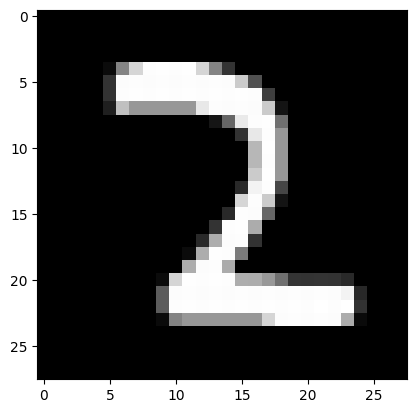

In [4]:
# used to test later 
def DataColToImage(x):
    image = Image.fromarray(TrainingData[x, :].reshape(28,28) * std + mean)
    plt.imshow(image)
    print("correct ans:", dat.iloc[x, 0])
DataColToImage(random.randint(0,42000))

In [5]:
TrainingData[1, :].shape

(784,)

In [6]:
# separate training and test data by indexes 
testNum = 6000
allIndex = list(range(0,42000))
trainIndex = []
for i in range(0, 42000 - testNum):
    x = random.randint(0, len(allIndex) - 1)
    trainIndex.append(allIndex[x])
    allIndex.pop(x)
testIndex = allIndex
print(len(testIndex))

6000


In [7]:
x = np.array([[1,2,3],
              [1,2,3]])

y = np.array([[1,2,3]])

y.shape

(1, 3)

In [8]:
inputNumber = 784
Hidden1NeuronCount = 70
Hidden2NeuronCount = 90 
outputCount = 10
learningRate = 0.1

# all weights from each row will lead to same neuron of the next layer 
# all weights from same column will act on same neuron of current layer
# first row weights are all weights that lead to first neuron in the next layer, etc
# first column weights are all weights that act on first neuron of current layer 
# weight.T = [all weights that act on first neuron of current layer]
#          [all weights that act on second neuron of current layer], etc...
# weight = [all weights that lead to first neuron of next layer]
#            [all weights that lead to second neuron of next layer], etc... 
# data will be a single column
# next layer calculated will be single column with all neurons (good)
# h,g,f,H,G,F == inactivated and activated hidden layers and final layers respectively

weights1 = np.random.uniform(-0.5,0.5,(Hidden1NeuronCount, inputNumber))
weights2 = np.random.uniform(-0.5,0.5,(Hidden2NeuronCount, Hidden1NeuronCount))
weights3 = np.random.uniform(-0.5,0.5,(outputCount, Hidden2NeuronCount))

biases1 = np.random.uniform(-0.1,0.1,(Hidden1NeuronCount, 1))
biases2 = np.random.uniform(-0.2,0.2,(Hidden2NeuronCount, 1))
biases3 = np.random.uniform(-0.3,0.3,(outputCount,1))

print(weights1.shape, weights2.shape, weights3.shape)
sig(weights1)

(70, 784) (90, 70) (10, 90)


array([[0.49670802, 0.58977223, 0.57305145, ..., 0.49069776, 0.58084372,
        0.52568822],
       [0.48632837, 0.49698852, 0.617952  , ..., 0.49365605, 0.54354712,
        0.5446149 ],
       [0.55310722, 0.58806342, 0.59387984, ..., 0.41983128, 0.45269945,
        0.41784308],
       ...,
       [0.58364564, 0.45718331, 0.49471531, ..., 0.51349727, 0.60626645,
        0.42370254],
       [0.4387553 , 0.47763559, 0.53934498, ..., 0.58579666, 0.53167056,
        0.50856667],
       [0.39442968, 0.40306901, 0.60197416, ..., 0.40112003, 0.39441408,
        0.45621646]])

In [9]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

def test():
    # single test
    randomTest = testIndex[random.randint(0, testNum-1)] # only uses testdata for testing dont use data that will be iused in raining 
    prams = forwardProp(randomTest, weights1, weights2, weights3, biases1, biases2, biases3)
    modelAns, hidden1, hidden2, finallayer, UnactivatedHidden1, UnativatedHidden2, UnactivatedFinalLayer, data = prams
    ans = finallayer
    cost = np.sum((modelAns - finallayer)**2)
    DataColToImage(randomTest)
    print("predicted:", ans.argmax())
    return ans

def testMany():
    # test a bunch for accuracy calculations 
    correct = 0
    wrong = 0
    for i in range(0, testNum):
        singleTest = testIndex[i] # only uses testdata for testing dont use data that will be iused in raining
        finallayer = forwardProp(singleTest, weights1, weights2, weights3, biases1, biases2, biases3)[3]
        ans = softmax(finallayer)
        pred = ans.argmax()
        corr = int(dat.iloc[singleTest, 0])
        if pred == corr:
            correct += 1
        else:
            wrong += 1
    print("accuracy:", str((correct/(correct + wrong))*100) + "%" , flush=False)



In [10]:
def forwardProp(x, weight1, weight2, weight3, bias1, bias2, bias3):
    # forward propagation 
    data = TrainingData[x,:].reshape(inputNumber,1)
    
    UnactivatedHidden1 = np.dot(weight1, data)
    hidden1 = sig(UnactivatedHidden1) + bias1

    UnativatedHidden2 = np.dot(weight2, hidden1)
    hidden2 = sig(UnativatedHidden2) + bias2

    UnactivatedFinalLayer = np.dot(weight3, hidden2)
    finalLayer = sig(UnactivatedFinalLayer) + bias3

    correctAns = dat.iloc[x,0]
    modelAns = np.zeros((1,outputCount)) # create empty array
    modelAns[0,correctAns] = 1 # make the correct index become 1 rest remain 0
    return [modelAns, hidden1, hidden2, finalLayer, UnactivatedHidden1, UnativatedHidden2, UnactivatedFinalLayer, data]

forwardProp(41999, weights1, weights2, weights3, biases1, biases2, biases3) #[3].shape

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]]),
 array([[-0.0501347 ],
        [-0.04189422],
        [ 0.17273293],
        [ 1.02803618],
        [ 0.34243068],
        [ 0.95155955],
        [ 1.03500718],
        [ 0.67285059],
        [ 0.94451592],
        [ 0.99145867],
        [ 0.08954079],
        [ 0.0861523 ],
        [ 0.80321941],
        [ 1.07557895],
        [ 1.00367707],
        [ 0.34615534],
        [-0.06455227],
        [ 0.9054819 ],
        [-0.09459704],
        [ 1.0380422 ],
        [ 0.02651877],
        [-0.05125385],
        [ 0.08881162],
        [ 0.91149327],
        [ 1.09314141],
        [ 0.24682617],
        [ 1.08846527],
        [ 0.46393074],
        [ 0.10897368],
        [ 0.12294643],
        [-0.04353983],
        [ 0.0198012 ],
        [ 0.06521752],
        [ 0.97605084],
        [ 0.06114099],
        [ 0.03491035],
        [ 0.08139984],
        [-0.0382419 ],
        [ 0.32496009],
        [ 0.9996354 ],
        [ 0.07469025],
     

In [11]:
biases3



array([[-0.27426642],
       [-0.24264707],
       [ 0.08992821],
       [-0.19185259],
       [-0.17313066],
       [ 0.19604069],
       [ 0.14903526],
       [-0.1931181 ],
       [-0.23887227],
       [ 0.19663929]])

In [12]:
x = np.array(([1,2,3],
             [1,2,3]))
np.sum(x, 0)

array([2, 4, 6])

In [13]:
# optimise weights 
def backProp(params):
# h,g,f,H,G,F == inactivated and activated hidden layers and final layers respectively
    global weights1, weights2, weights3, biases1, biases2, biases3
    modelAns, H, G, F, h, g, f, data = params
    modelAns = modelAns.reshape(outputCount,1)
    cost = np.mean((modelAns - F)**2)
    
    
    dCdF = -2*(modelAns - F)
    dCdf = dCdF * sigDeriv(f)

    dCdG = np.sum(dCdf * weights3, 0).reshape(Hidden2NeuronCount,1)

    dCostdWeights3 = np.ones_like(weights3) * G.reshape(1, Hidden2NeuronCount) * dCdf
    
    dGdg = sigDeriv(g)

    dCdH = np.sum((dGdg * dCdG) * weights2, 0).reshape(Hidden1NeuronCount,1)

    dCostdWeights2 = np.ones_like(weights2) * H.reshape(1, Hidden1NeuronCount) * dCdG * dGdg

    dHdh = sigDeriv(h)

    dCostdWeights1 = np.ones_like(weights1) * data.reshape(1, inputNumber) * dCdH * dHdh

    dCostdBiases3 = dCdF 
    dCostdBiases2 = dCdG 
    dCostdBiases1 = dCdH
    weights3 -= dCostdWeights3 * learningRate
    weights2 -= dCostdWeights2 * learningRate
    weights1 -= dCostdWeights1 * learningRate
    biases3 -= dCostdBiases3 * learningRate
    biases2 -= dCostdBiases2 * learningRate
    biases1 -= dCostdBiases1 * learningRate
    return cost

backProp(forwardProp(3, weights1, weights2, weights3, biases1, biases2, biases3))

0.24302034015230248

In [17]:
# train of some data 
for i in range(42000 - testNum):
    x = trainIndex[i] # dont train on testdata
    cost = backProp(forwardProp(i, weights1, weights2, weights3, biases1, biases2, biases3))
    if i%1000 ==0: # every 1000 iteration print cost 
        print(f"{i}. cost = ", cost)


0. cost =  0.0005983681121282407
1000. cost =  0.0007250338746619368
2000. cost =  0.00025423328830864636
3000. cost =  0.0006452816786848546
4000. cost =  0.003084636301926164
5000. cost =  0.04167574018458127
6000. cost =  0.0015570877075287077
7000. cost =  0.0038882978031294104
8000. cost =  0.001899317303483727
9000. cost =  0.004953094807183221
10000. cost =  0.05463143932357504
11000. cost =  0.0009053418632555081
12000. cost =  0.003045834137785132
13000. cost =  0.039096084409454106
14000. cost =  0.002159420667588953
15000. cost =  0.00012662513432534328
16000. cost =  0.0008786918231327955
17000. cost =  3.702454309223761e-05
18000. cost =  0.002837990663528239
19000. cost =  0.0002724173290752147
20000. cost =  0.005483949296244727
21000. cost =  0.001488305950765399
22000. cost =  9.18349170617989e-05
23000. cost =  0.002836446367653273
24000. cost =  5.2410760240125526e-05
25000. cost =  0.00042387417896243144
26000. cost =  0.00024372328142850233
27000. cost =  0.0013092

correct ans: 6
predicted: 6


array([[-0.01318978],
       [ 0.00118632],
       [ 0.02242755],
       [-0.03018494],
       [ 0.00407859],
       [-0.00800139],
       [ 1.10545765],
       [-0.004911  ],
       [-0.00422826],
       [-0.01776093]])

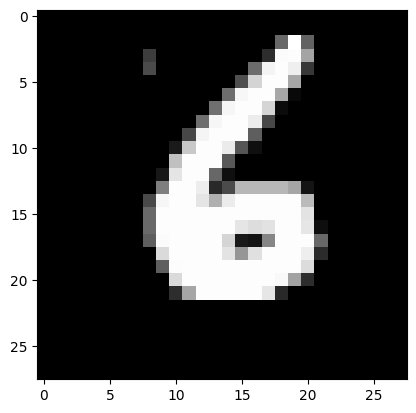

In [18]:
test() # do one to visualise 


In [19]:
testMany() # do many for accuracy calculation 

accuracy: 94.46666666666667%
